In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing #scale
import matplotlib.pyplot as plt 

# Data Generation Code

In [20]:
genes = ['gene' + str(i) for i in range(1,101)]
genes[:3]

['gene1', 'gene2', 'gene3']

wt= wild type samples


ko= knock out samples

In [3]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
wt[:3]

['wt1', 'wt2', 'wt3']

In [4]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for gene in data.index: 
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [6]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  921  929  999  970  922  946  948  932  996  948
gene2  237  245  260  237  241  728  771  679  713  743
gene3  226  210  237  203  227  572  605  603  576  616
gene4  753  803  767  733  737  511  504  510  493  528
gene5  772  794  782  798  788  661  627  628  628  605


In [7]:
print(data.shape)

(100, 10)


In [8]:
data=data.T
data.head()

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,921,237,226,753,772,129,679,481,140,230,...,598,898,132,484,295,745,559,932,698,15
wt2,929,245,210,803,794,126,664,507,145,199,...,604,954,158,396,352,753,576,975,675,11
wt3,999,260,237,767,782,116,629,526,119,208,...,622,991,141,454,344,701,611,962,710,18
wt4,970,237,203,733,798,114,687,487,128,204,...,625,981,134,413,366,780,589,1035,752,13
wt5,922,241,227,737,788,120,688,508,122,214,...,612,942,141,420,315,752,583,952,669,14


Data yang dimiliki adalah data dengan 100 fitur (genes) ditunjukkan oleh **KOLOM**. Dan 10 observasi data **BARIS**

# Perform PCA on the data

scale = $\frac{(measure-mean)^2}{n.measurements}$

In [9]:
# First center and scale the data
scaled_data = preprocessing.scale(data)

In [19]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

# Draw a scree plot and a PCA plot

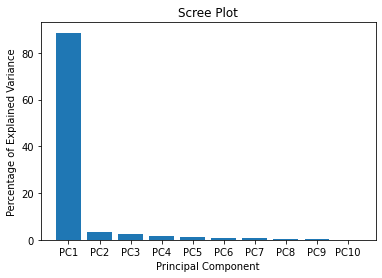

In [11]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [12]:
np.round(pca.explained_variance_ratio_* 100, decimals=1)

array([88.6,  3.3,  2.5,  1.8,  1.3,  0.9,  0.8,  0.4,  0.3,  0. ])

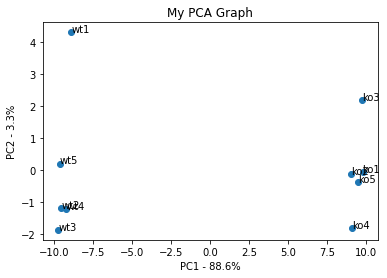

In [13]:

#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

**Insight**



*   Secara umum data terdiri atas 2 cluster yaitu ko dan wt
*   Semakin jauh jarak titik observasi semakin jauh karakteristiknya
*   Nilai informasi yang ditangkap oleh visualisi diatas PC 1 sebesar 92.5%
 





# Determine which genes had the biggest influence on PC1

In [14]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

gene1      0.009757
gene2      0.105572
gene3      0.105810
gene4     -0.104924
gene5     -0.104421
             ...   
gene96    -0.102890
gene97    -0.106152
gene98    -0.105992
gene99    -0.105942
gene100    0.105976
Length: 100, dtype: float64

Loading score menunjukkan nilai korelasi fitur terhadap PC, semakin besar loading score semakin memberi kontribusi yang besar terhadap PC

In [15]:
## now sort the loading scores based on their magnitude (besar ke kecil)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

gene58    0.106198
gene45    0.106195
gene89    0.106185
gene69    0.106169
gene46    0.106161
            ...   
gene94    0.054215
gene35    0.050012
gene42    0.041749
gene22    0.034873
gene1     0.009757
Length: 100, dtype: float64

In [16]:
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

In [17]:
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene58   -0.106198
gene45    0.106195
gene89    0.106185
gene69    0.106169
gene46    0.106161
gene75   -0.106156
gene43    0.106155
gene97   -0.106152
gene54    0.106149
gene66   -0.106132
dtype: float64


In [18]:
10 variabel yang memberikan impact tertinggi pada PC

SyntaxError: invalid syntax (Temp/ipykernel_11440/664869943.py, line 1)

PCA bagian dari Unsupervised Learning

PCA dapat Melihat karakteristik data high dimensi



## Self Learning: Membuat PCA dengan data Iris yang telah dikenali sebelumnya